## Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import sqrt
from datetime import datetime, timedelta

In [2]:
try:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')

In [3]:
try:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
except:
    orders = pd.read_csv('/datasets/orders_info_short.csv')

In [4]:
try:
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
except:
    costs = pd.read_csv('/datasets/costs_info_short.csv')

### Предобработка данных visits

In [5]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
sorted(visits['Region'].unique(), reverse=True)

['United States', 'UK', 'Germany', 'France']

In [8]:
sorted(visits['Device'].unique(), reverse=True)

['iPhone', 'PC', 'Mac', 'Android']

In [9]:
sorted(visits['Channel'].unique(), reverse=True)

['organic',
 'lambdaMediaAds',
 'YRabbit',
 'WahooNetBanner',
 'TipTop',
 'RocketSuperAds',
 'OppleCreativeMedia',
 'MediaTornado',
 'LeapBob',
 'FaceBoom',
 'AdNonSense']

In [10]:
visits.duplicated().sum()

0

In [11]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

В загруженном датафрейме visits 309901 строк и 6 столбцов. Явные дубликаты и пропуски отстутствуют.

Замечания:

* Названия столбцов следует изменить в нижний регистр
* Cтолбцы Session Start и Session End имеют неверный тип данных. Необходимо поменять на datetime.

In [12]:
# меняем столбцы на нижний регистр 
visits.columns = ['user_id','region','device','channel', 'session_start', 'session_end']

In [13]:
# меняем тип столбцов на datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [14]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


### Предобработка данных orders

In [15]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [17]:
orders.duplicated().sum()

0

In [18]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

В загруженном датафрейме orders 40212 строк и 3 столбцов. Явные дубликаты и пропуски отстутствуют.

Замечания:

* Названия столбцов следует изменить в нижний регистр
* Cтолбец Event Dt имеет неверный тип данных. Необходимо поменять на datetime.

In [19]:
# меняем столбцы на нижний регистр 
orders.columns = ['user_id','event_dt','revenue']

In [20]:
# меняем тип столбцов на datetime
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [21]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


### Предобработка данных costs

In [22]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [23]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [24]:
costs.duplicated().sum()

0

In [25]:
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

В загруженном датафрейме costs 1800 строк и 3 столбцов. Явные дубликаты и пропуски отстутствуют.

Замечания:

* Названия столбцов следует изменить в нижний регистр
* Cтолбец dt имеет неверный тип данных. Необходимо поменять на datetime.

In [26]:
# меняем столбцы на нижний регистр 
costs.columns = ['dt','channel','costs']

In [27]:
# меняем тип столбцов на datetime
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [28]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


### Вывод

В процессе подготовки данных были проделаны следующие действия:
* Привели названия столбцов нижнему регистру. 
* Проверили все столбцы на неявные дубликаты и пропуки.
* Столбцы  с датами были приведены к нужному типу.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Последовательная  и качественная предобработка, так держать!

## Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### get_profiles() — для создания профилей пользователей

In [29]:
#Функция для создания профилей пользователей
def get_profiles(sessions, orders, ad_costs):
 
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
 
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = pd.to_datetime(profiles['first_ts']).dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
 
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
 
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
 
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
 
    )
 
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
 
    return profiles

### get_retention() — для подсчёта Retention Rate

In [30]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### get_conversion() — для подсчёта конверсии

In [31]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### get_ltv() — для подсчёта LTV

In [32]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### filter_data() — для сглаживания данных

In [33]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### plot_retention() — для построения графика Retention Rate

In [34]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### plot_conversion() — для построения графика конверсии

In [35]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### plot_ltv_roi — для визуализации LTV и ROI

In [36]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Вывод:

Заданы функции для последующего анализа данных:

* get_profiles() — для создания профилей пользователей,
* get_retention() — для подсчёта Retention Rate,
* get_conversion() — для подсчёта конверсии,
* get_ltv() — для подсчёта LTV.

А также функции для построения графиков:

* filter_data() — для сглаживания данных,
* plot_retention() — для построения графика Retention Rate,
* plot_conversion() — для построения графика конверсии,
* plot_ltv_roi — для визуализации LTV и ROI.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Необходимые функции добавлены

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [37]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [38]:
# считаем min()
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

In [39]:
# считаем max()
profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

Из полученных данных видим, что самая ранняя регистрация пользователей была 1.05.2019, а самая поздняя - 27.10.2019.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Максимальная и миниальная даты определены правильно

### Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [40]:
# составим pivot и применим функции count к user_id и sum к payer.
regions_payer = profiles.pivot_table(index='region', values=['user_id','payer'], aggfunc={'user_id':'count','payer':'sum'}) 
# считаем процент платящих на регион
regions_payer['payer_rate'] = regions_payer['payer']/regions_payer['user_id']*100
# удаляем ненужный столбец
regions_payer.drop(['payer'], axis=1, inplace=True)
# меняем названия столбцов для понятности 
regions_payer.columns = ['user_id_qty', 'payer_rate']
# сортируем данные
regions_payer.sort_values(by='payer_rate', ascending=False)

,user_id_qty,payer_rate
region,,
United States,100002,6.901862
Germany,14981,4.111875
UK,17575,3.982930
France,17450,3.799427


По данным видим, что по количеству привлеченных пользователей (в том числе платящих пользователей) лидирует Американский регион.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Все верно, пользователи в основном локализованы в Штатах

### Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [41]:
# составим pivot и применим функции count к user_id и sum к payer.
device_payer = profiles.pivot_table(index='device', values=['user_id','payer'], aggfunc={'user_id':'count','payer':'sum'}) 
# считаем процент платящих на регион
device_payer['payer_rate'] = device_payer['payer']/device_payer['user_id']*100
# удаляем ненужный столбец
device_payer.drop(['payer'], axis=1, inplace=True)
# меняем названия столбцов для понятности 
device_payer.columns = ['user_id_qty', 'payer_rate']
# сортируем данные
device_payer.sort_values(by='payer_rate', ascending = False)

,user_id_qty,payer_rate
device,,
Mac,30042,6.364423
iPhone,54479,6.207897
Android,35032,5.851793
PC,30455,5.046790


Данные показывают, что большая доля пользователей относится к пользователям Mac и IPhone. Что логично для Американкого региона.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Согласен, "яблочные" устройства в целом преобладают у клиентов с не большим отрывом

### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [42]:
# составим pivot и применим функции count к user_id и sum к payer.
channel_payer = profiles.pivot_table(index='channel', values=['user_id','payer'], aggfunc={'user_id':'count','payer':'sum'}) 
# считаем процент платящих на регион
channel_payer['payer_rate'] = channel_payer['payer']/channel_payer['user_id']*100
# удаляем ненужный столбец
channel_payer.drop(['payer'], axis=1, inplace=True)
# меняем названия столбцов для понятности 
channel_payer.columns = ['user_id_qty', 'payer_rate']
# сортируем данные
channel_payer.sort_values(by='user_id_qty', ascending = False)

,user_id_qty,payer_rate
channel,,
organic,56439,2.055316
FaceBoom,29144,12.204914
TipTop,19561,9.600736
OppleCreativeMedia,8605,2.707728
LeapBob,8553,3.063253
WahooNetBanner,8553,5.296387
RocketSuperAds,4448,7.913669
MediaTornado,4364,3.574702
YRabbit,4312,3.826531


Очевидно, что FaceBoom и TipTop я вляются наиболее эффективными каналами привлечения пользователей. Конвертация в платящих пользователей среди них также самая высокая.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Все верно, также считаю важным отметить, что больше всего клиентов пришло "органическим" путем

### Вывод:

* Самая ранняя регистрация пользователей была 1.05.2019, а самая поздняя - 27.10.2019.
* По количеству привлеченных пользователей (в том числе платящих пользователей) лидирует Американский регион.
* Большая доля пользователей относится к пользователям Mac и IPhone. Что логично для Американкого региона.
* FaceBoom и TipTop я вляются наиболее эффективными каналами привлечения пользователей. Конвертация в платящих пользователей среди них также самая высокая.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Молодец, что не забываешь делать промежуточные выводы. Это отличная привычка для твоих будующих реальных проектов)

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Посчитайте общую сумму расходов на маркетинг.

In [43]:
# прсуммируем столбец costs в таблице costs
costs['costs'].sum()

105497.30000000002

Общая сумма расходов на маркетинг составила 105497.3 

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Общая сумма расходов на рекламу определена

### Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник

In [44]:
channel_costs = costs.groupby('channel').agg({'costs': 'sum'})
channel_costs['costs_rate'] = (channel_costs['costs']/(costs['costs'].sum())).round(2)
channel_costs.sort_values(by='costs', ascending=False)

,costs,costs_rate
channel,,
TipTop,54751.30,0.52
FaceBoom,32445.60,0.31
WahooNetBanner,5151.00,0.05
AdNonSense,3911.25,0.04
OppleCreativeMedia,2151.25,0.02
RocketSuperAds,1833.00,0.02
LeapBob,1797.60,0.02
lambdaMediaAds,1557.60,0.01
MediaTornado,954.48,0.01


Самые большие траты на рекламы были сделаны для каналов TipTop и FaceBoom.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> И распределение трат по каналам тоже расчитал верно. Могу предложить вместе с абсолютными значениями в таблице вывести и их доли. Так ты повысишь информативность и упростишь понимание результата для пользователей

<div class="alert alert-info"> <b>Комментарий студента:</b> Дмитрий, привет!🙂 Добавил доли в таблицу</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Отличное дополнение)

### Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.

In [45]:
# создадим столбцы с указанием месяца и недели
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


In [46]:
# посторим pivot таблицы по расходам на рекламу по месяцам и неделям для всех каналов привлечения
pivot_week_costs = costs.pivot_table(index=['month', 'week'], columns='channel', values='costs', aggfunc='sum')
pivot_month_costs = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')


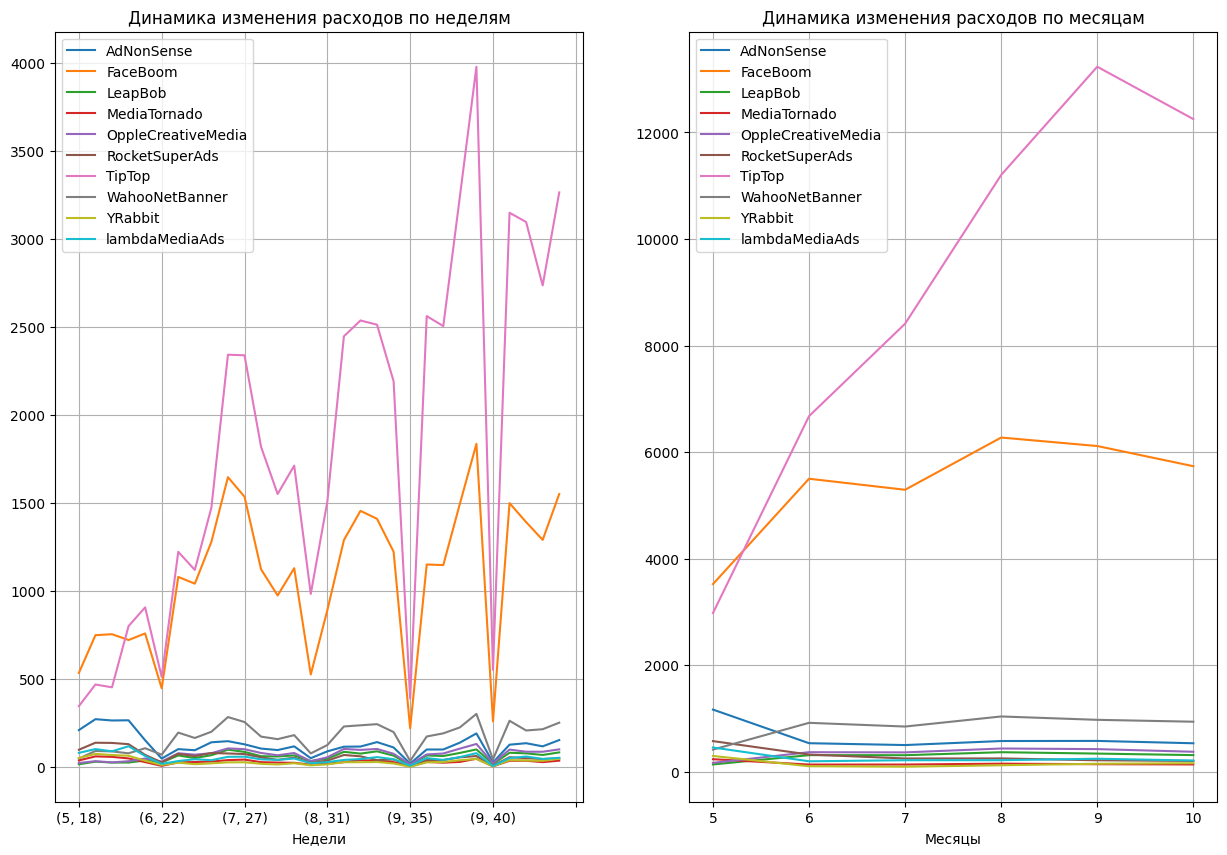

In [47]:
# построим графики через функцию subplot
plt.figure(figsize=(15, 10))

ax1 = plt.subplot(1, 2, 1)
pivot_week_costs.plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('Недели')
plt.title('Динамика изменения расходов по неделям')

ax2 = plt.subplot(1, 2, 2)
pivot_month_costs.plot(grid=True, ax=ax2)
plt.legend()
plt.xlabel('Месяцы')
plt.title('Динамика изменения расходов по месяцам')

plt.show()

🔁Самая явная динамика увеличения затрат прослеживается у TipTop и FaceBoom. По недельному графику виднны сезонные пики в периоды второй половины июня и сентября. Траты по остальным каналам привлечения держатся примерно на одном уровне в течение всего периода.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1<a class="tocSkip"></h2>

<b>На доработку🤔:</b> Общий тренд графиков описан верно! Но по менее сглаженному графику по неделям также стоит обратить внимание на сезонные аномалии 

<div class="alert alert-info"> <b>Комментарий студента:</b> Слегка изменил недельный график (сделал привязку недель к месяцам для большей понятности) и переписал вывод с учетом сезонных наблюдений.</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Интересное дополнение месяцов к неделям, возможно это повысит информативность! А по выводам я полностью согласен с тобой

### Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей

In [48]:
channel_cac = profiles.query('channel != "organic"').pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')
channel_cac['acquisition_cost'] = channel_cac['acquisition_cost'].round(2)
project_acquisition_cost_mean = profiles['acquisition_cost'].mean()
channel_cac['cost_difference'] = (channel_cac['acquisition_cost'] - project_acquisition_cost_mean).round(2)
channel_cac.sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost,cost_difference
channel,,
TipTop,2.80,2.10
FaceBoom,1.11,0.41
AdNonSense,1.01,0.31
lambdaMediaAds,0.72,0.02
WahooNetBanner,0.60,-0.10
RocketSuperAds,0.41,-0.29
OppleCreativeMedia,0.25,-0.45
MediaTornado,0.22,-0.48
YRabbit,0.22,-0.48


Привлечение пользователей обходится дороже всего с TipTop (2.8) и FaceBoom (1.11). Самыми дешевыми являются каналы YRabbit и LeapBob.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1<a class="tocSkip"></h2>

<b>На доработку🤔:</b> Андрей, не корректно расчитывать САС для "органических" = бесплатных пользователей

<div class="alert alert-info"> <b>Комментарий студента:</b> Убрал органических пользователей из исследования</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> В качестве дополнения можно посчитать срений САС по проекту и оценить на сколько показатели отдельных каналов больше/меньше

<div class="alert alert-info"> <b>Комментарий студента:</b> Посчитал среднее от общих затрат и вывел разницу в стоимости привлечения отдельным столбцом</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Все верно, получается канал TipTop	в разы дороже

### Вывод:

* Общая сумма расходов на маркетинг составила 105497.
* Самые большие траты на рекламы были сделаны для каналов TipTop и FaceBoom.
* Самые большие траты на рекламы были сделаны для каналов TipTop и FaceBoom.
* Привлечение пользователей обходится дороже всего с каналов TipTop (2.8) и FaceBoom (1.11). Самыми дешевыми являются каналы YRabbit и LeapBob.

## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [49]:
# задаем момент анализа и горизонт анализа согласно условию
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

In [50]:
# по прописанной ранее функции get_ltv считаем LTV и ROI.
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

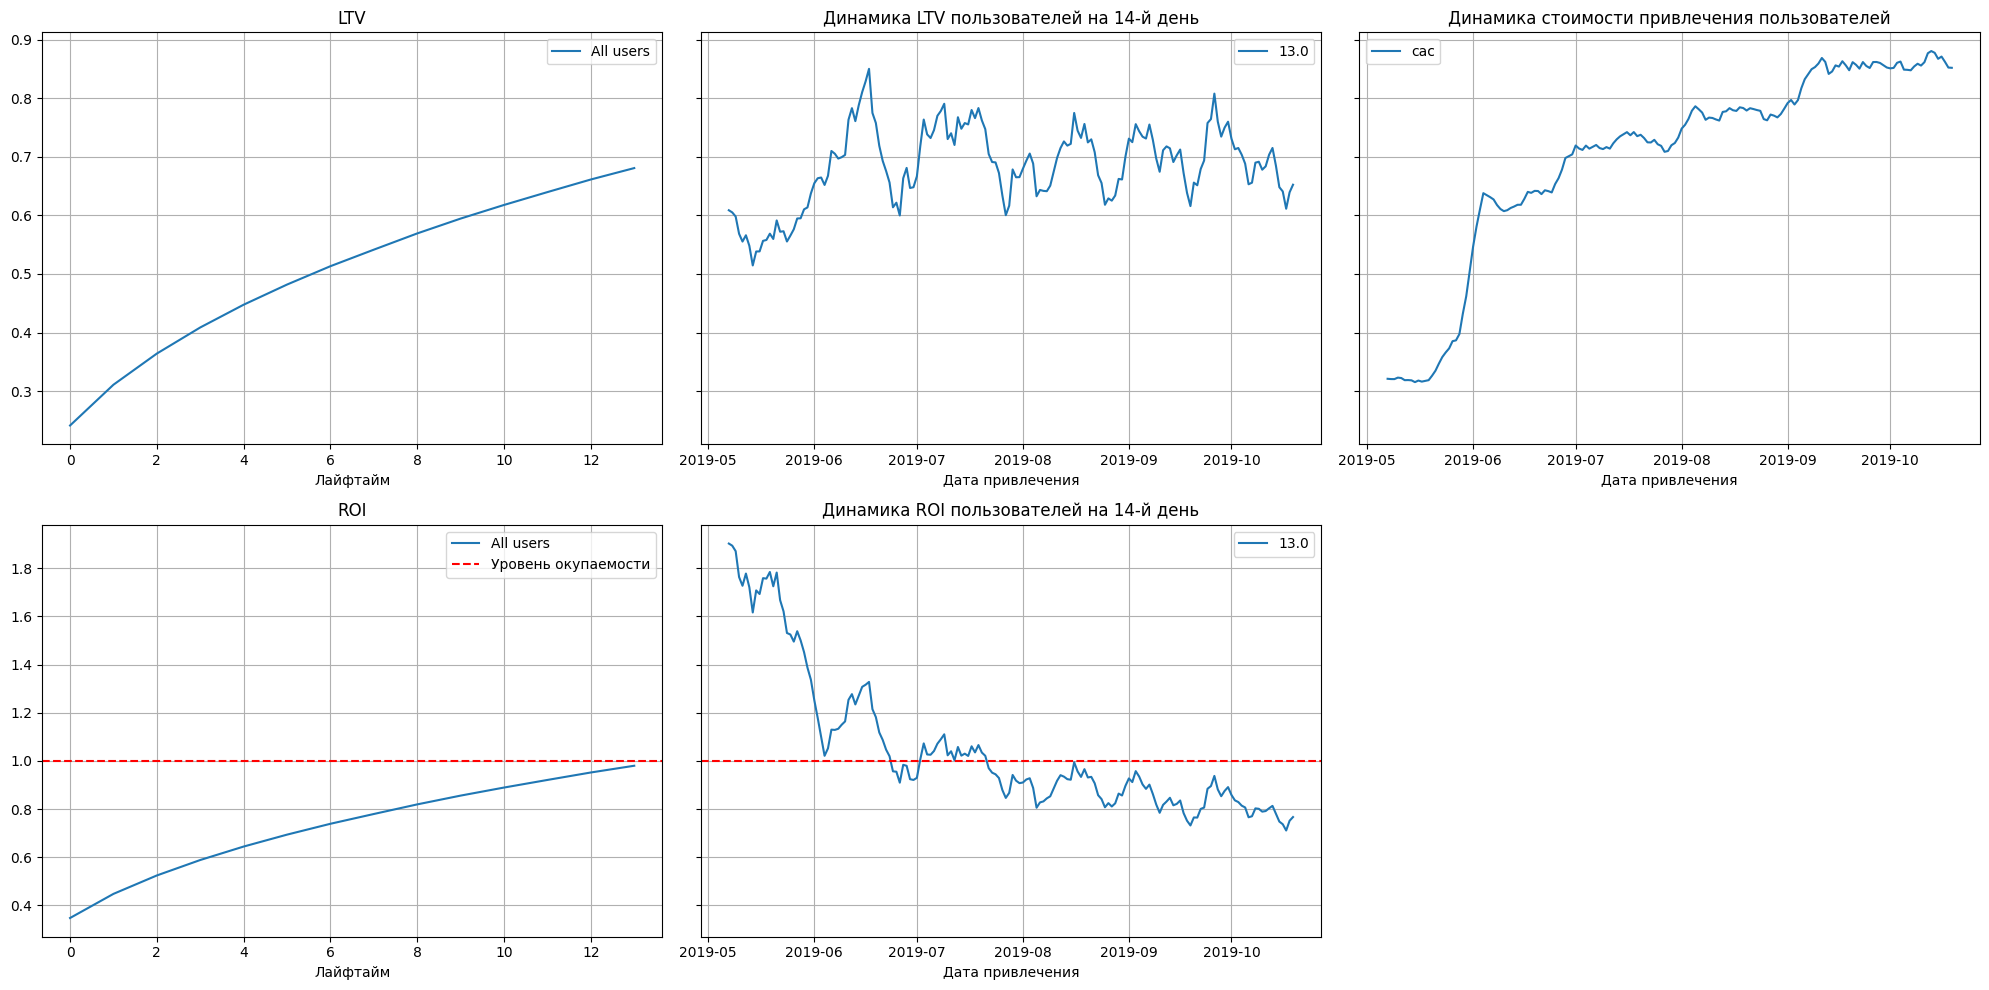

In [51]:
# по прописанной ранее функции plot_ltv_roi строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

По графикам можно сделать следующие выводы:
* График LTV стабильный, с тенленцией увеличания, как и должно быть. С качеством пользователей всё в порядке.
* САС постоянно увеличивается. Значит постоянно растут затраты на рекламу для привлечения пользователей.
* ROI на всем протяжении ниже уровня окупаемости. Значит затраты на рекламу не окупаются.
* Затраты окупались только лишь для когорт первых 2 месяцев. Возможно стоит обратить внимание на сезонность.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Основыные показатели посчитаны верно. Рекламная компания на заданном горизонте анализа, действительно не окупилась. Попробуем понять причины

### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

In [52]:
# считаем конверсию по функции get_conversion
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days)

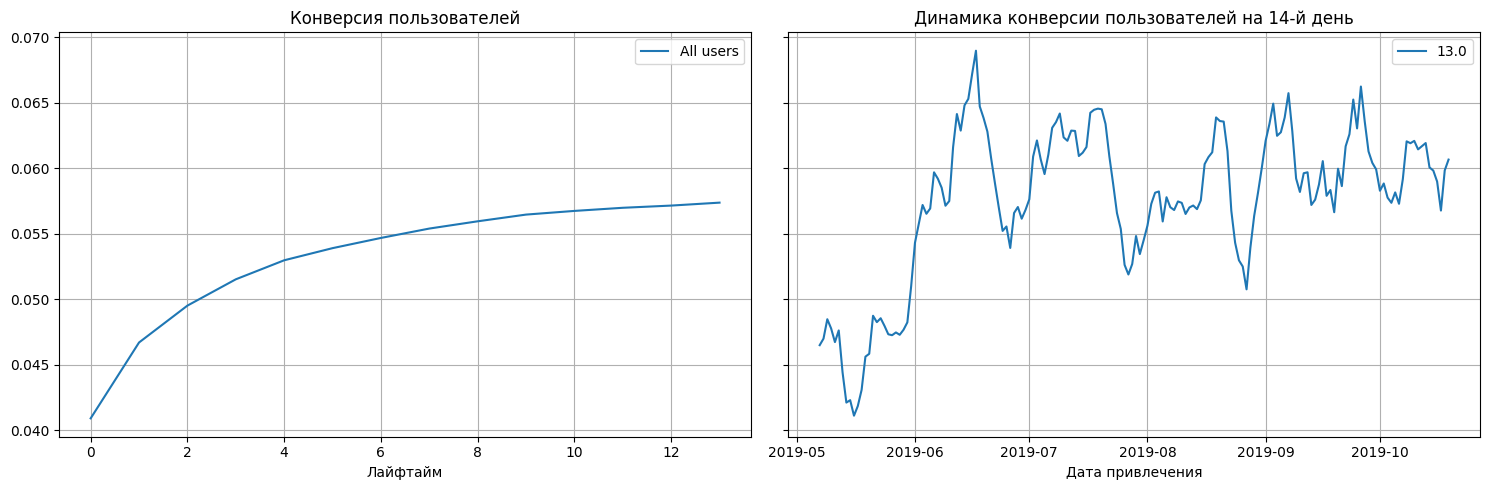

In [53]:
# строим графики по функции plot_conversion
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

График конверсии стабилен. Пользователи конвертируются средне, но постоянно.

In [54]:
# считаем удержание по функции get_retentionю
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days)

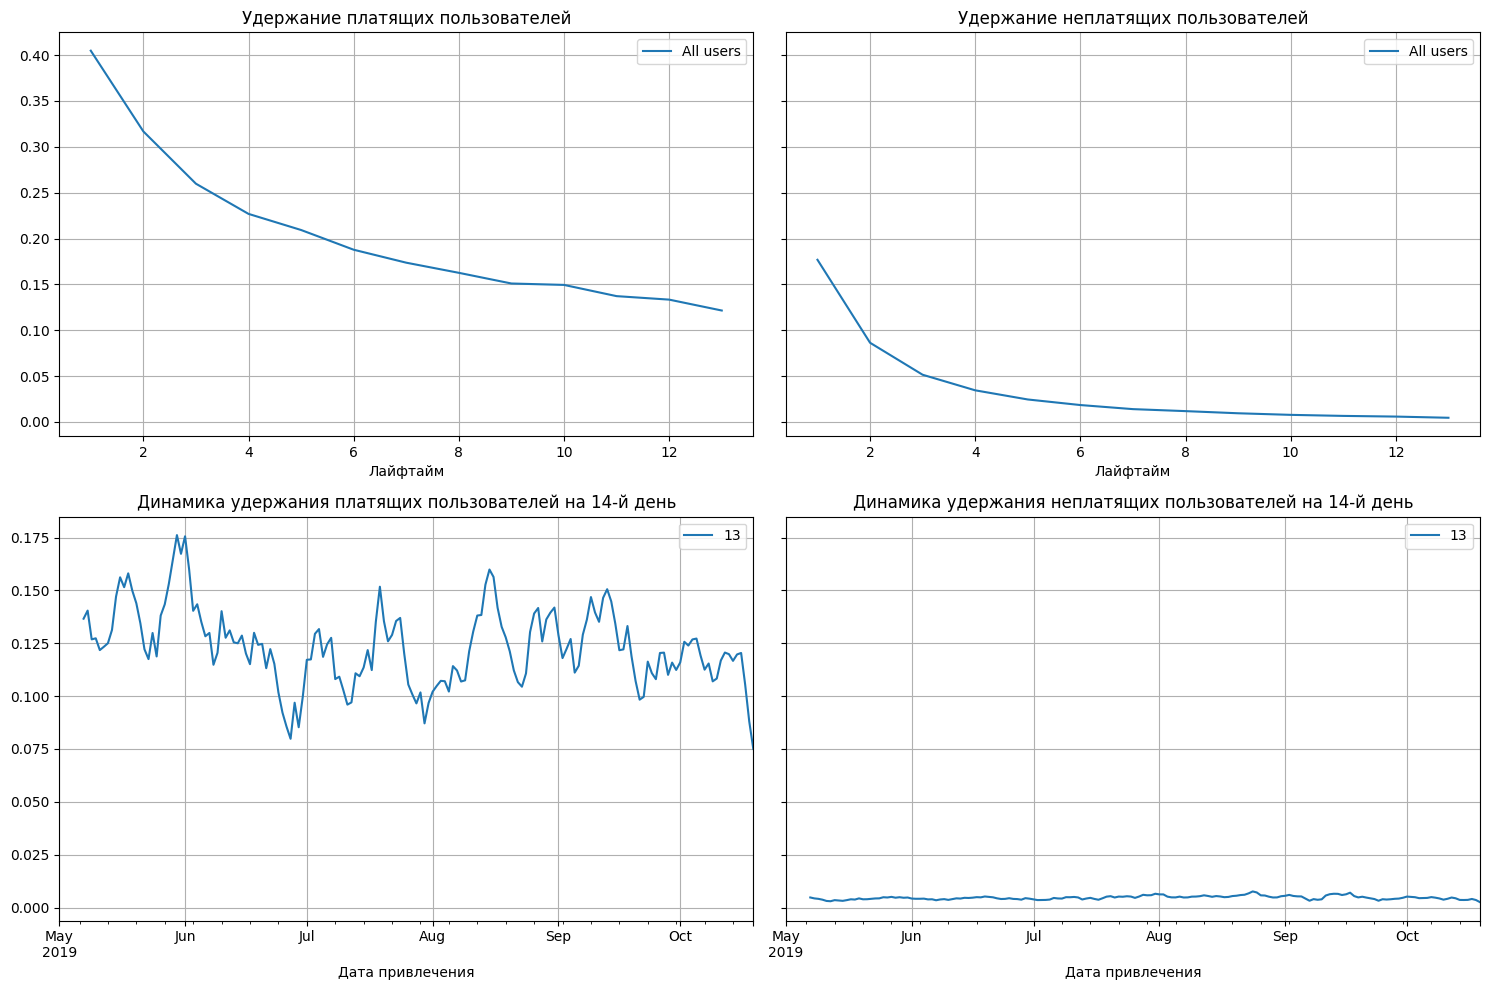

In [55]:
# строим графики по функции plot_retention
plot_retention(retention_grouped, retention_history, horizon_days) 

График демонстрирует очень низкое удержание. Удержание платящих пользователей при этом выше чем неплатящих.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Общая конверсия и удержание пользователей проекта проанализированы корректно.

##### Конверсия и удержание по странам

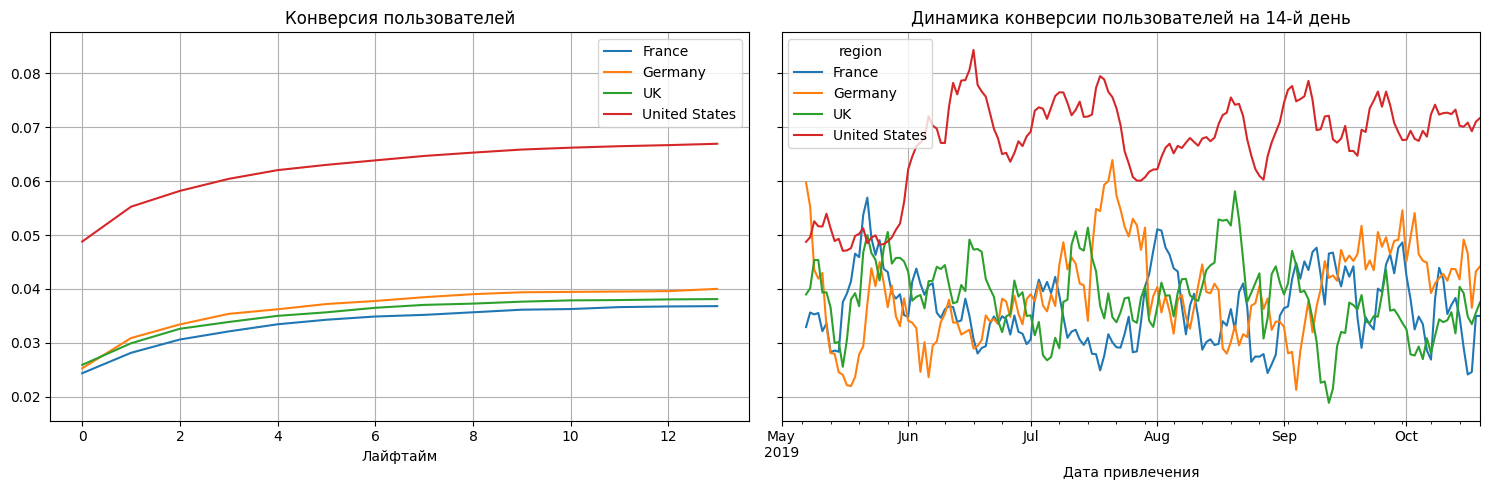

In [56]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions= ['region'])
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

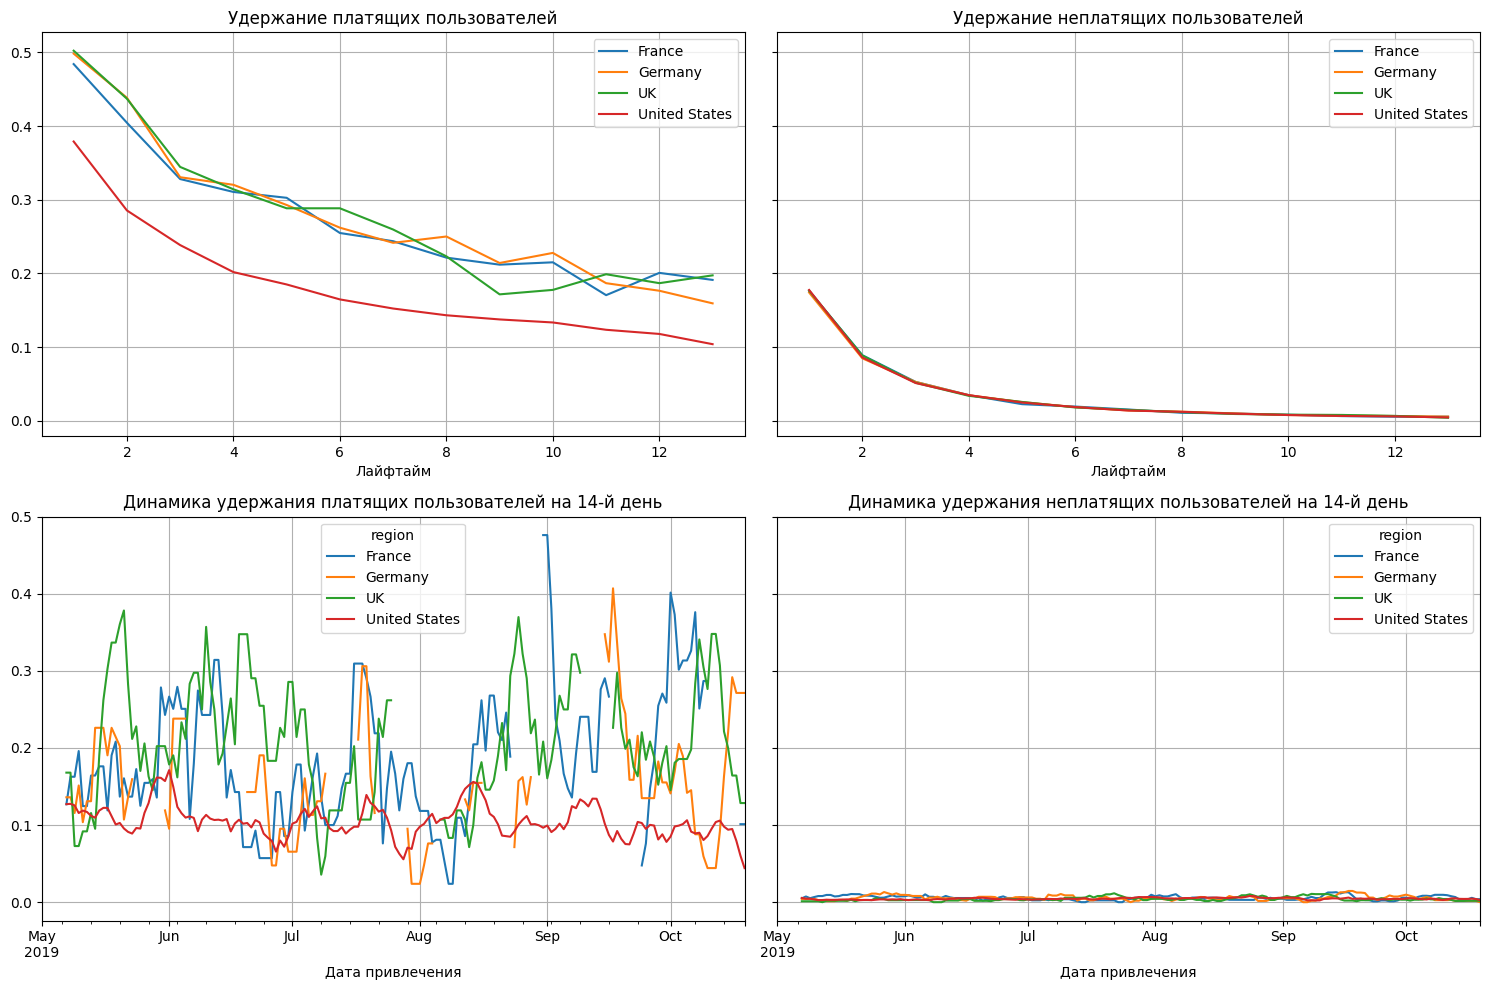

In [57]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions= ['region'])
plot_retention(retention_grouped, retention_history, horizon_days) 

На фоне выделяется Американский регион. У него самая высокая конверсия, при этом самый низкий показатель удержания.

##### Конверсия и удержание по устройствам

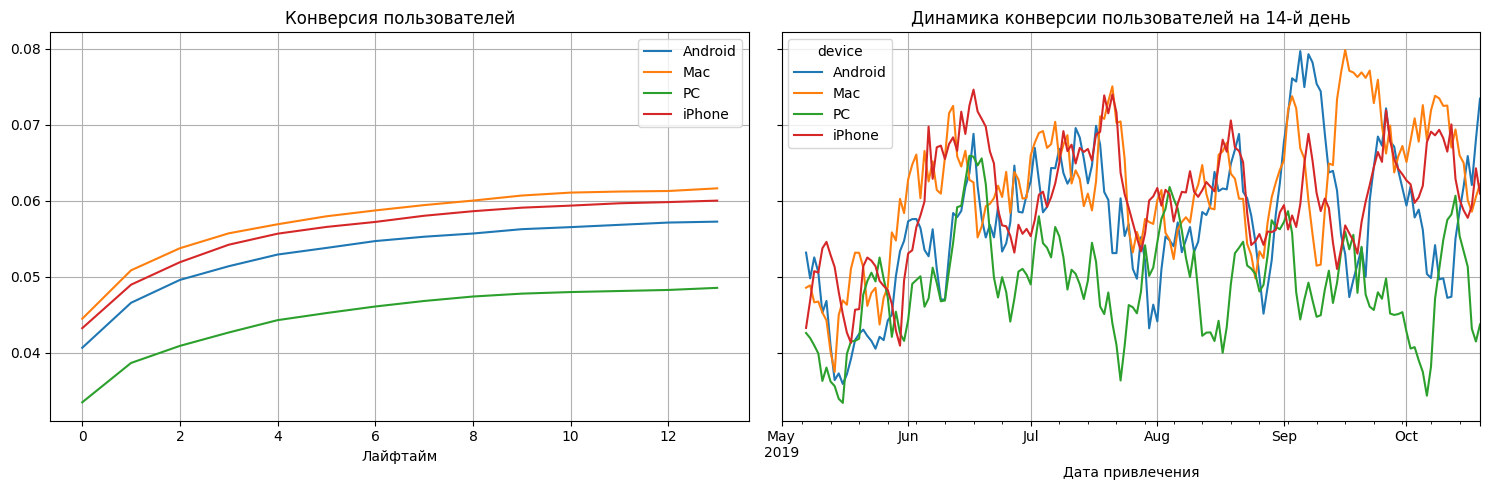

In [58]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['device'])
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

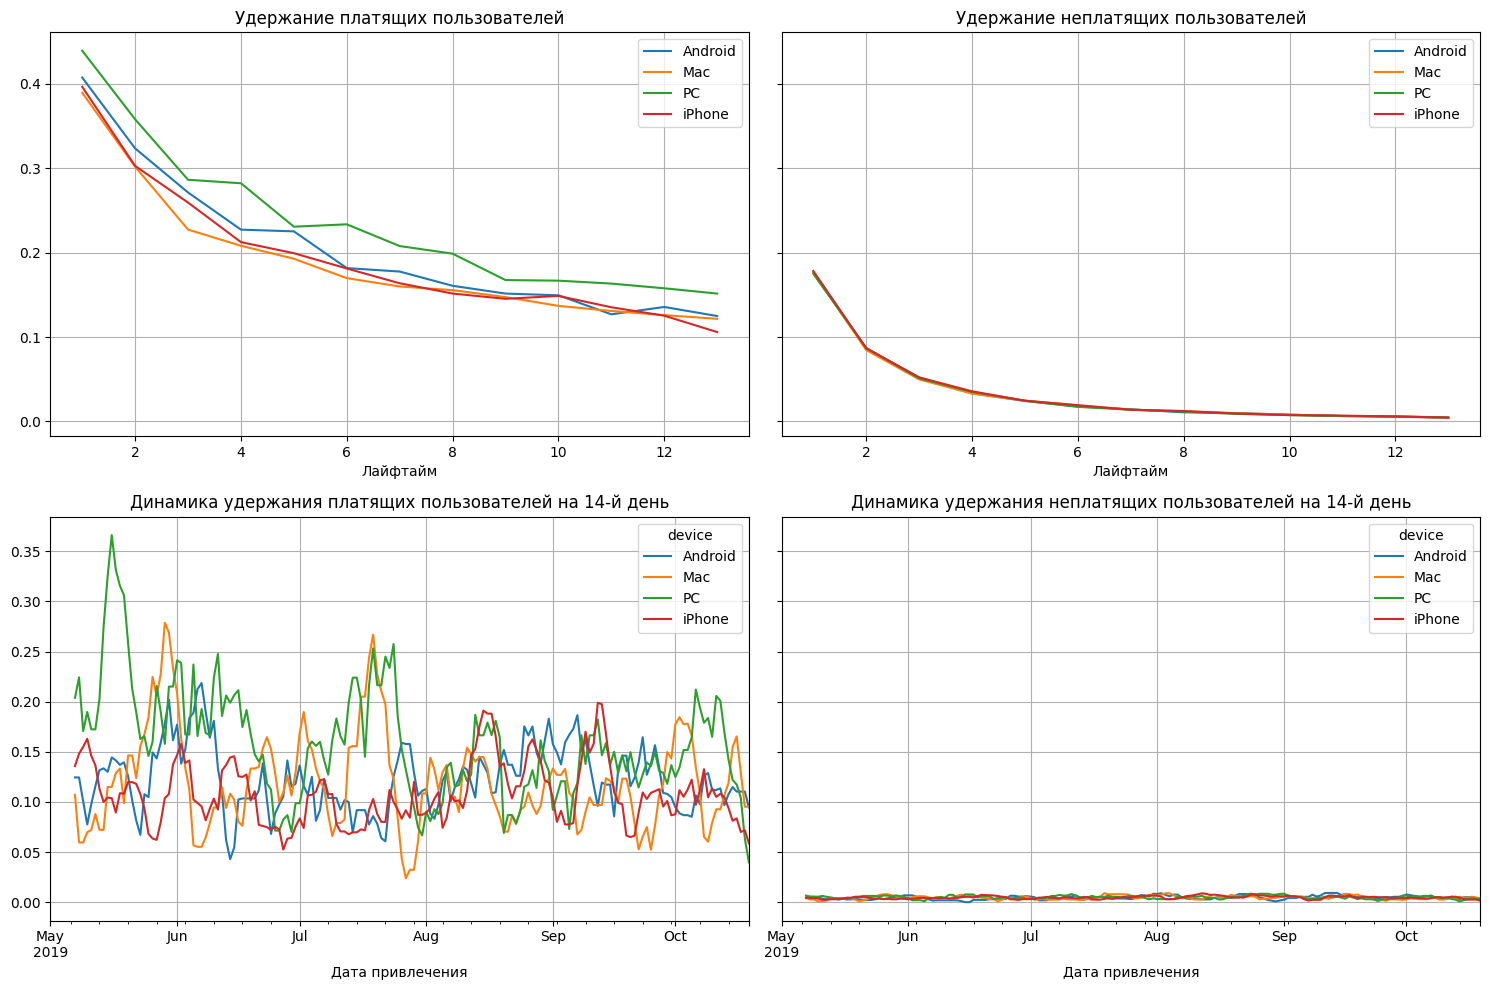

In [59]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions= ['device'])
plot_retention(retention_grouped, retention_history, horizon_days) 

Если судить по устройствам, то самое высокое у пользователей PC, но при этом самая низкая конверсия. У пользователей IOS удержание ниже.

##### Конверсия и удержание по каналам привлечения

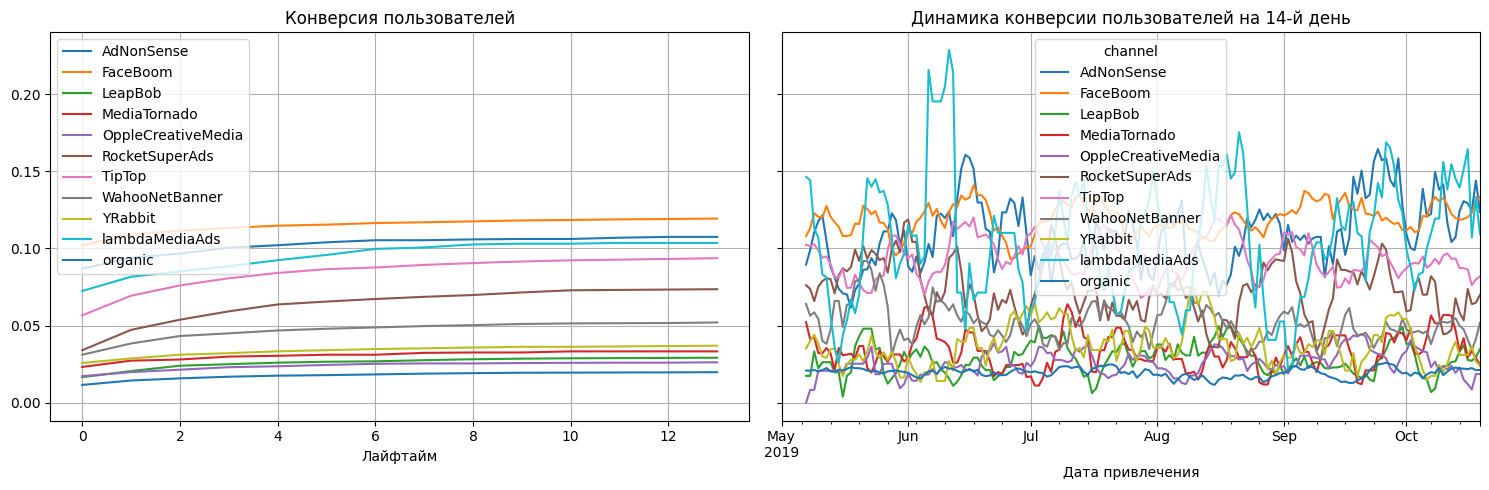

In [60]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

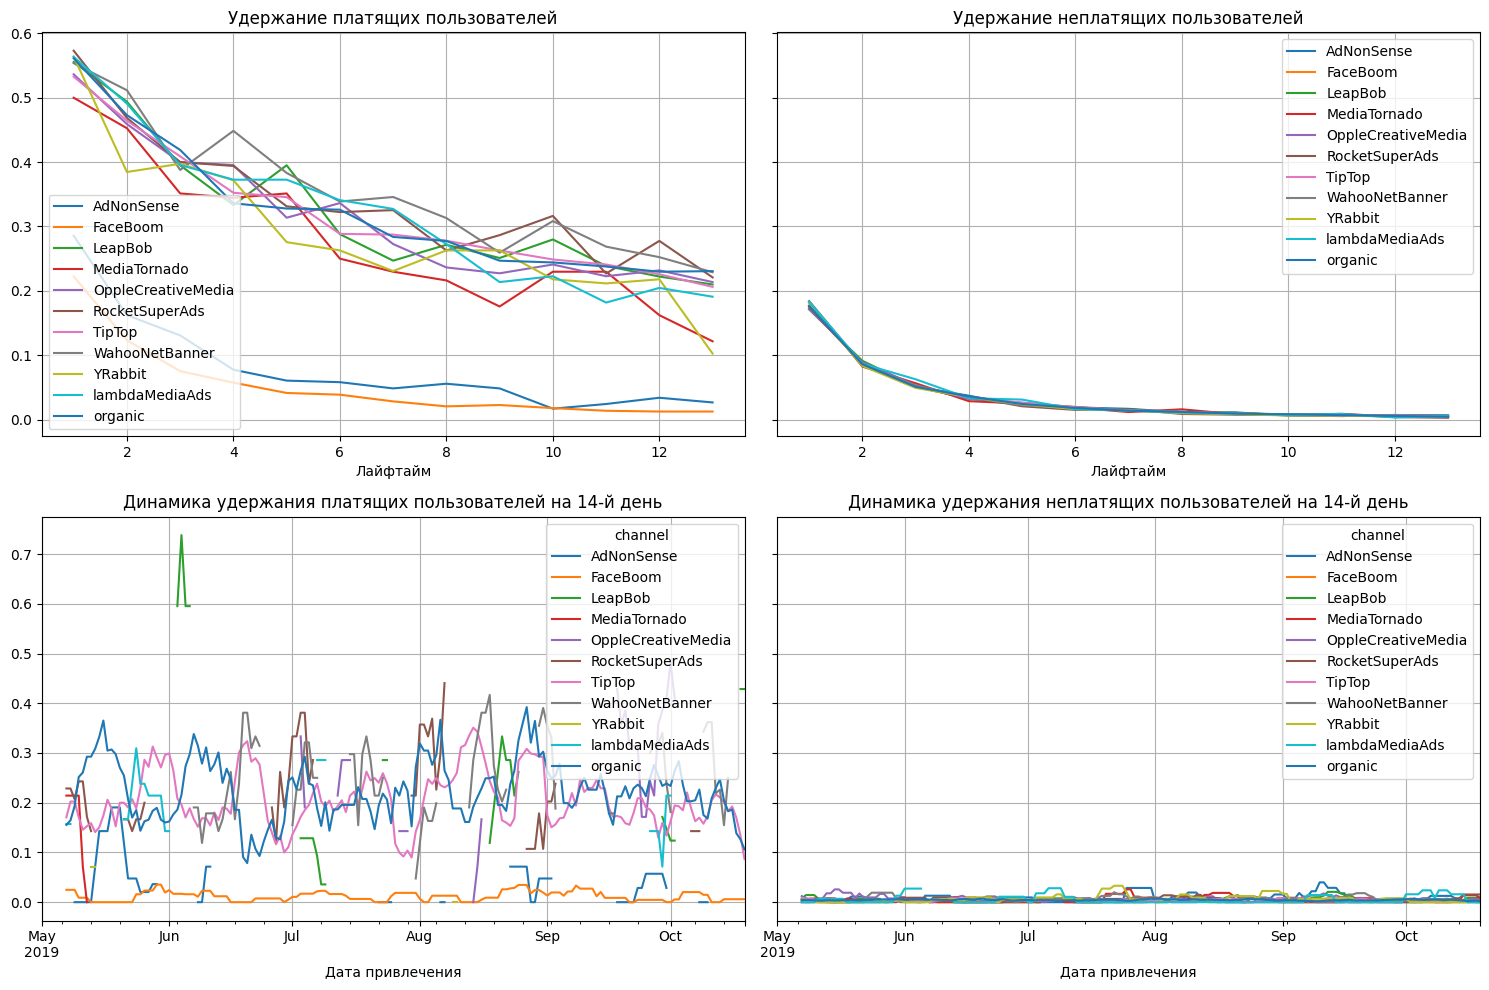

In [61]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions= ['channel'])
plot_retention(retention_grouped, retention_history, horizon_days) 

По конверсии лидируют FaceBoom, LambdaMedia и TipTop, при этом достойное удержание из них только у TipTop.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [62]:
# по функции get_ltv считаем LTV и ROI. Пропиcываем в параметре dimension 'device'.
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions= ['device'])

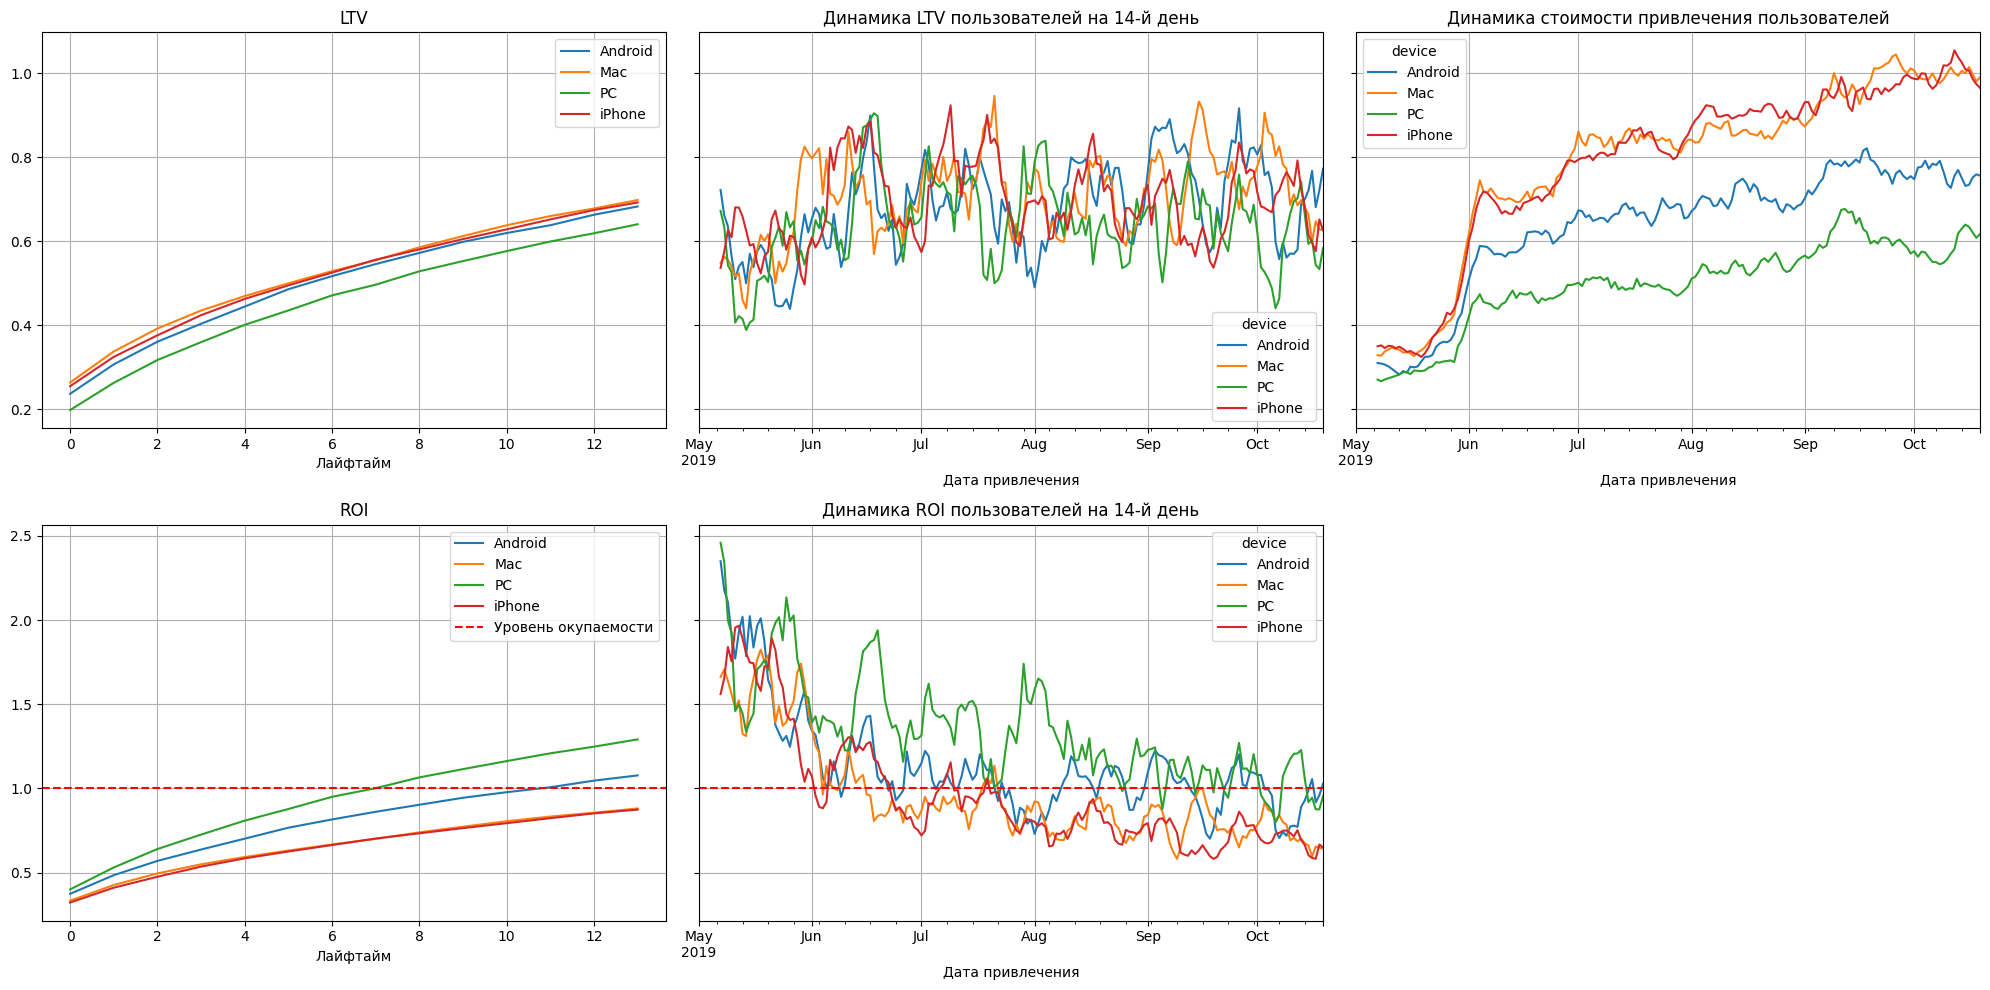

In [63]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

По графикам видно, что стоимость привлечения для устройств Mac и IPhone сильно повысилась за период исследования, при этом перестали окупаться к второму месяцу. Остались окупаемыми только затраты по каналу устройств PC.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично, все показатели оцениваешь верно

### Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [64]:
# по функции get_ltv считаем LTV и ROI. Пропиcываем в параметре dimension 'region'.
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions= ['region'])

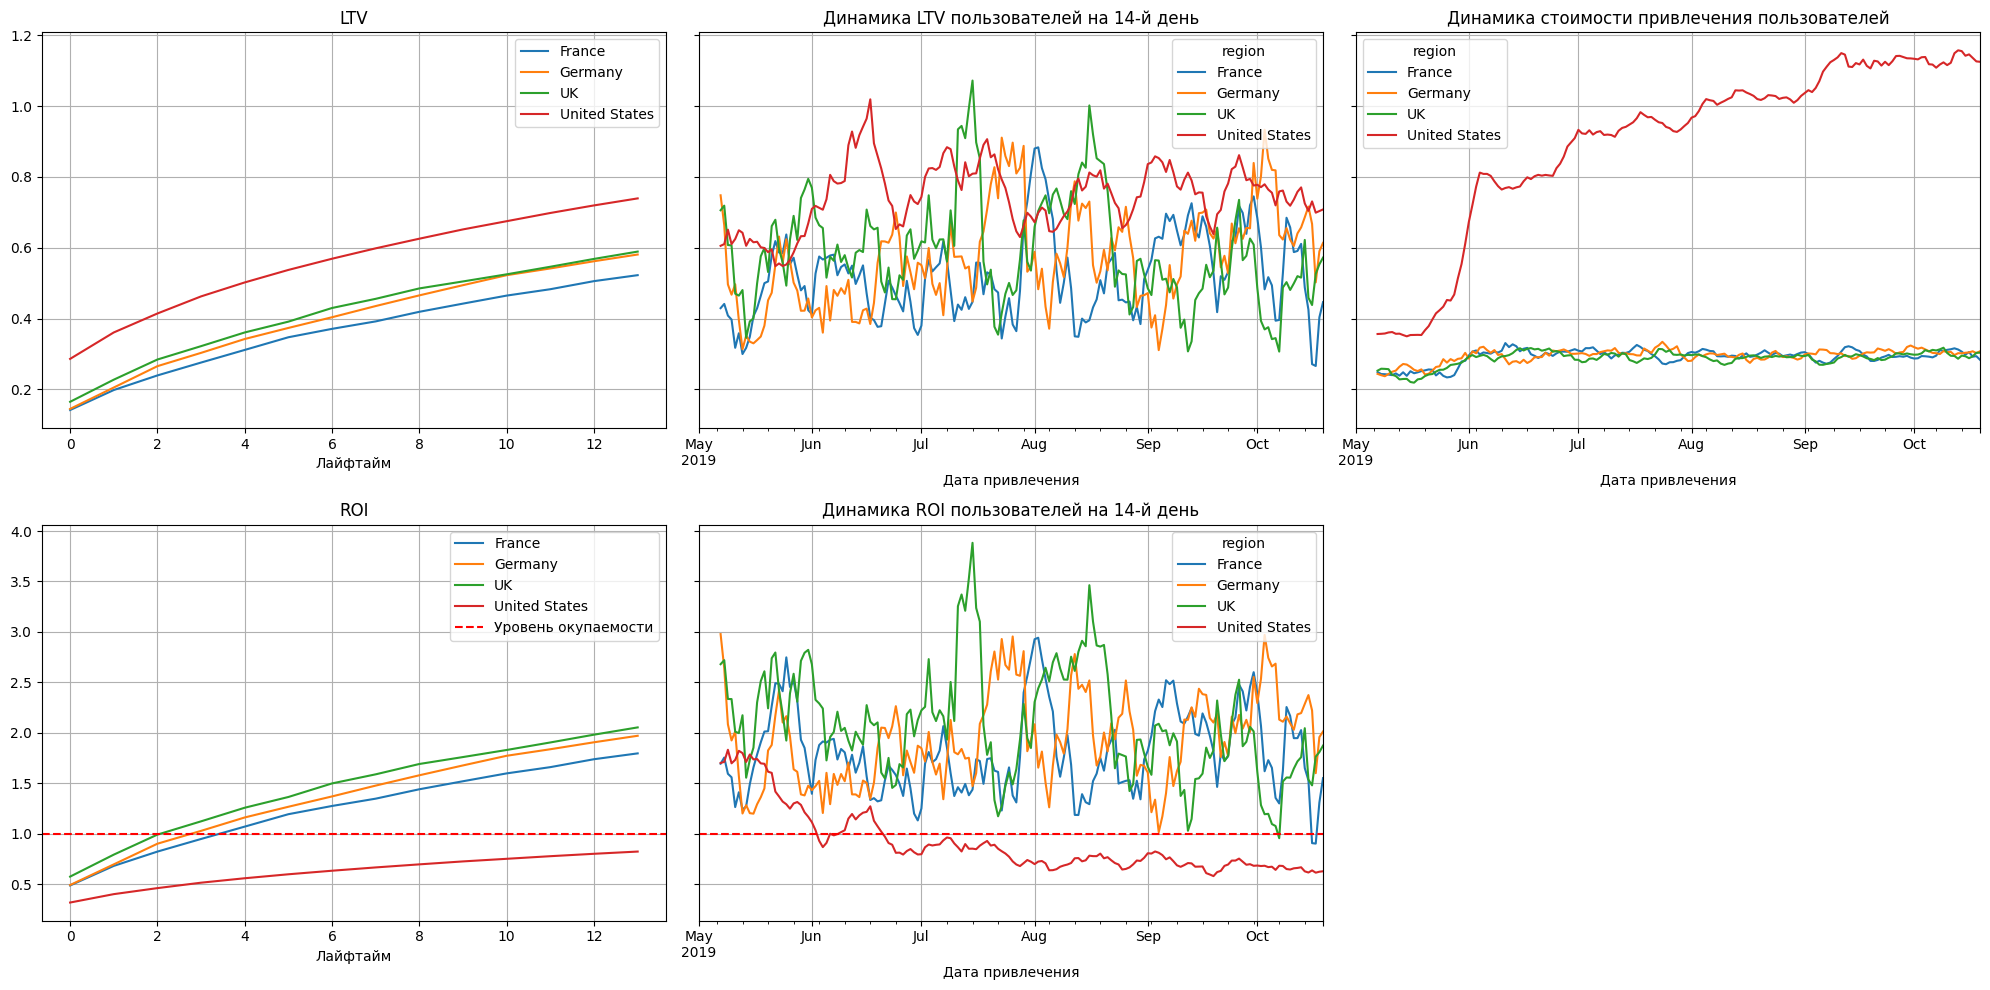

In [65]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

Видно, что проблема в регионе United States. Там был использован самый большой бюджет на привлечение пользователей, при этом данные траты перестали окупаться уже после первого месяца использования приложения. По остальным регионам ситуация достаточно хорошая.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Метрики США явно выбиваются из "общей картины". Могу предожить также проанализировать особенности в разрезе США/Европа и сравнить эти дву бизнес-модели

<div class="alert alert-info"> <b>Комментарий студента:</b> Провел анализ сравнения USA и Europe ниже. Всё подтверждается -  "Америка тащит всех на дно" </div>

In [66]:
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

In [67]:
def categorize_region(region):
    try:
        if region == 'United States':
            return 'USA'
        elif region == 'France' or 'Germany' or 'UK':
            return 'Europe'
    except:
        pass
profiles['region_category'] = profiles['region'].apply(categorize_region)

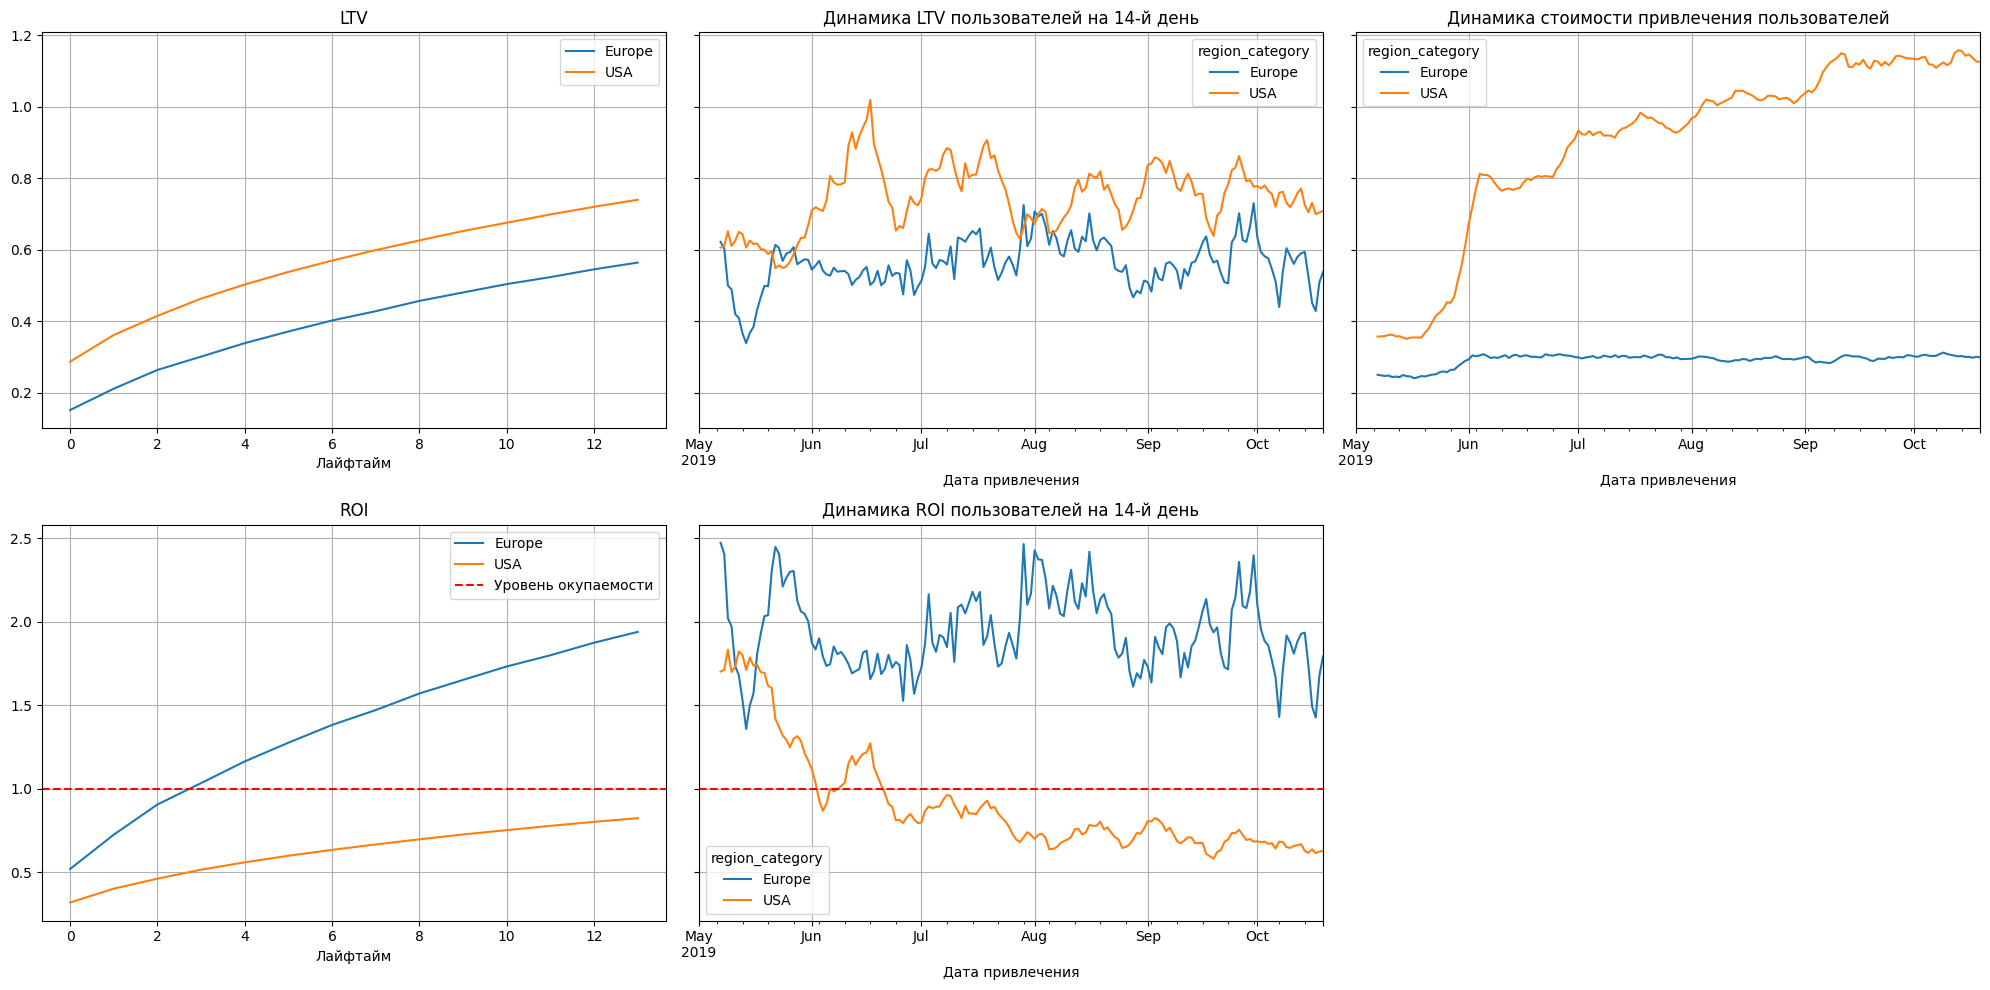

In [68]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions= ['region_category'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Все верно, Американская модель крайне не эффективна

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [69]:
# по функции get_ltv считаем LTV и ROI. Пропиcываем в параметре dimension 'channel'.
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions= ['channel'])

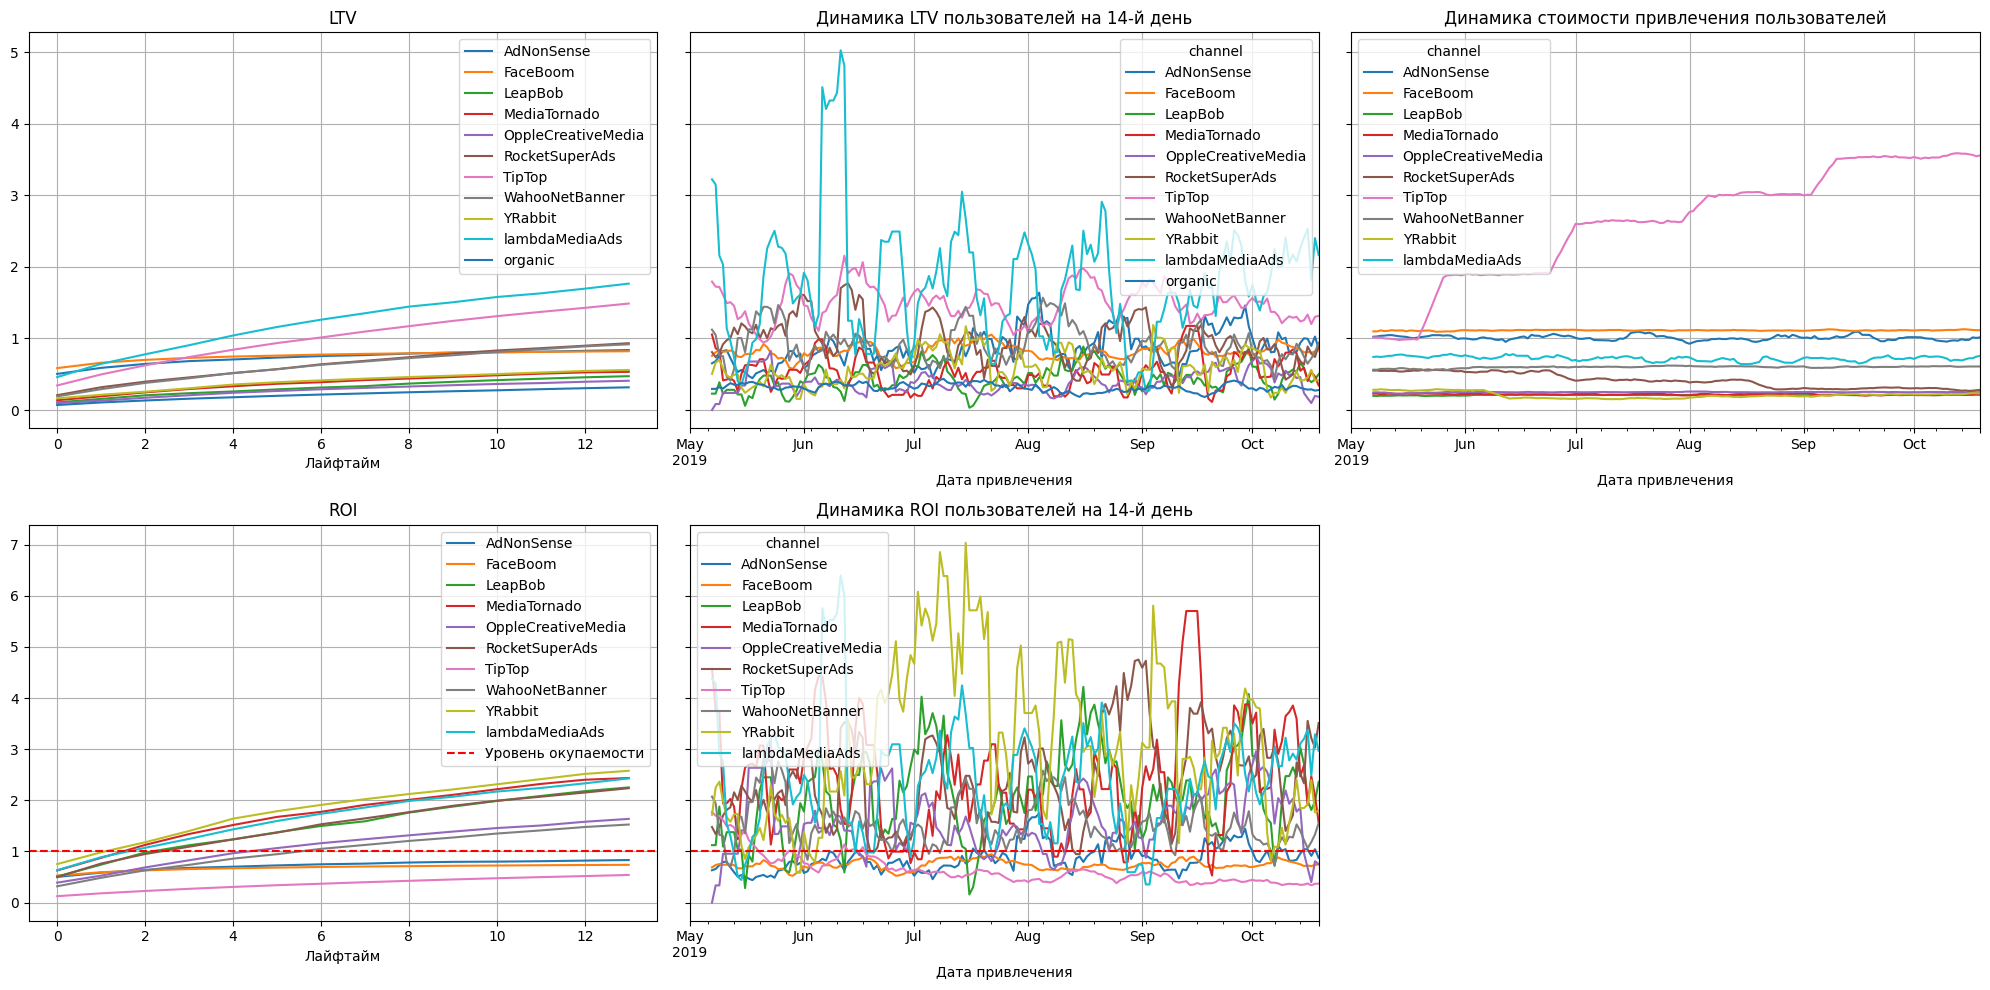

In [70]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

Не окупаются 3 канала привлечения - TipTop, FaceBoom и AdNonSense, среди которых явно больше всего просел TipTop, т.к. его затраты на рекламу самые большие. Ситуация по остальным каналам достаточно стабильна. Отличные показатели у канала LambdaMediaAds

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Все верно, с метриками каналов привлечения разобрались. 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1<a class="tocSkip"></h2>

<b>На доработку🤔:</b> По условию задания еще требуется проанализировать конверсию и удержание пользователей с разбивкой по странам, каналам привлечения, устройствам. Возможно удастся подметить важные особенности для твоего исследования

<div class="alert alert-info"> <b>Комментарий студента:</b> Я их сделал для себя, чтобы ответить ниже, но не стал сохранять, т.к. в самом задании данное требование отутствует. Добавил графики подпунктами в пункт 5.2 подпунктами👌</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Результаты конверсии и удержания интерпретировал абсолютно верно.
    
Но в задании это как раз есть)
    
`"Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам."`

### Окупается ли реклама, направленная на привлечение пользователей в целом?

Общий график ROI показал, что реклама, направленная на привлечение пользователей, в целом не окупается.

### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Анализ показал, что на общую статистику негативно влияют:
* устройства MAC и IPhone
* американский регион
* каналы TipTop, FaceBoom и AdNonSense

### Чем могут быть вызваны проблемы окупаемости?

Проблемы окупаемости могут быть вызваны большими тратами на рекламную компанию и недостаточный показатель удержания пользователей.

## Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

### Выделите причины неэффективности привлечения пользователей.

* Низкий уровень удержания пользователей, который явно бросается в глаза у пользователей США на устройствах IOS. Это может говорить о том, что приложение неинтересно пользователю, либо интерфейс не позволяет пользователю комфортно воспользоваться сервисом приложения
* Рекламная стратегия привлечения пользователей. В США самые большие затраты на рекламное привлечение пользователей по каналам с самым низким удержанием, которое в итоге стало убыточным, перекрывая доходную статистику по другим регионам.

### Сформулируйте рекомендации для отдела маркетинга.

* Обратить внимание на низкий уровень удержания. Возможно стоит сделать интерфейс приложения боллее интересным, удобным и интерактивным. Стоит рассмотреть точечные акции на проблемные каналы привлечения для увеличения конверсии пользователей.
* Стоит пересмотреть рекламную доктрину. Уменьшить финансирование проблемных каналов привлечения и перенаправить средства на  каналы с более высоким удержанием пользователей. В США, например, таким каналом является RocketSuperAds.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Андрей, отличные ёмкие итоговый вывод и рекомендации. Но для повышения эффективности работы отдела маркетинга в реальных проектах от тебя потребуют более детальный и развернутый ответ. Например, можно предложить рассмотреть Европейский рынок с его рекламными каналами, а также уделить особое внимание PC-пользователям как наиболее стабильному сегменту.

<div class="alert alert-info"> <b>Комментарий студента:</b> Дмитрий, спасибо за проверку. Все замечания и недочеты устранил. Насчет последнего замечания выше согласен, совсем забыл указать про стабильность PС пользователей и возможную стимуляцию Европейских каналов для увеличения их LTV. </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Андрей, спасибо за качественную отработку всех моих комментариев и хорошую обратную связь)
    
Проект был не простой, но ты отлично справился! У тебя сильные аналитические способности и владение инструментарием.

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера V2**:
     Молодец! Ошибки исправлены, проект зачтен. Поздравляю тебя, увидимся в практикуме ;)